In [37]:
import random
"""
point[index, (x,y)]
layout[index, place]
"""
point=[]
layout=[]
filename = "./readytorun.txt"

In [38]:
def prepare_data(select):
    point.clear()
    layout.clear()
    num = 1
    for line in open(filename):
        index, x, y = line.strip().split(",")
        if int(index) % select == 0:
            point.extend([(num,(float(x),float(y)))])
            num = num + 1
    for i in range(len(point)):
        layout.append([i+1, random.randint(1,4), 0])
    print(layout[:])
    print(point[:])

In [39]:
prepare_data(1)

[[1, 3, 0], [2, 2, 0], [3, 2, 0], [4, 1, 0], [5, 4, 0], [6, 4, 0], [7, 4, 0], [8, 3, 0], [9, 1, 0], [10, 3, 0], [11, 4, 0], [12, 1, 0], [13, 3, 0], [14, 4, 0], [15, 3, 0], [16, 2, 0], [17, 4, 0], [18, 2, 0], [19, 3, 0], [20, 4, 0], [21, 2, 0], [22, 3, 0], [23, 4, 0], [24, 2, 0], [25, 2, 0], [26, 2, 0], [27, 3, 0], [28, 3, 0], [29, 4, 0], [30, 2, 0], [31, 1, 0], [32, 4, 0], [33, 2, 0], [34, 4, 0], [35, 4, 0], [36, 2, 0], [37, 4, 0], [38, 2, 0], [39, 1, 0], [40, 3, 0], [41, 3, 0], [42, 2, 0], [43, 4, 0], [44, 1, 0], [45, 4, 0], [46, 2, 0], [47, 3, 0], [48, 1, 0], [49, 1, 0], [50, 1, 0], [51, 3, 0], [52, 4, 0], [53, 2, 0], [54, 4, 0], [55, 2, 0], [56, 1, 0], [57, 1, 0], [58, 4, 0], [59, 1, 0], [60, 4, 0], [61, 3, 0], [62, 3, 0], [63, 4, 0], [64, 4, 0], [65, 3, 0], [66, 2, 0], [67, 3, 0], [68, 1, 0], [69, 2, 0], [70, 3, 0], [71, 2, 0], [72, 2, 0], [73, 4, 0], [74, 3, 0], [75, 4, 0], [76, 3, 0], [77, 2, 0], [78, 1, 0], [79, 2, 0], [80, 1, 0], [81, 2, 0], [82, 4, 0], [83, 4, 0], [84, 4, 0], 

In [40]:
gapx, gapy = 100, 50
def getPos(i,m):
    pointx = point[i][1][0]
    pointy = point[i][1][1]
    # print(pointx, pointy)
    if m==1:
        return [(pointx,pointy),(pointx+gapx,pointy),(pointx+gapx,pointy+gapy),(pointx,pointy+gapy)]
    elif m==2:
        return [(pointx-gapx,pointy),(pointx,pointy),(pointx,pointy+gapy),(pointx-gapx,pointy+gapy)]
    elif m==3:
        return [(pointx-gapx,pointy-gapy),(pointx,pointy-gapy),(pointx,pointy),(pointx-gapx,pointy)]
    else:
        return [(pointx, pointy-gapy),(pointx+gapx,pointy-gapy),(pointx+gapx,pointy),(pointx,pointy)]
    
print(getPos(1,2))

[(4188.0, 9739.0), (4288.0, 9739.0), (4288.0, 9789.0), (4188.0, 9789.0)]


In [41]:
def inner(point, rec):
    if point[0] > rec[0][0] and point[1] > rec[0][1] and point[0] < rec[1][0] and point[1] > rec[1][1] and point[0] < rec[2][0] and point[1] < rec[2][1] and point[0] > rec[3][0] and point[1] < rec[3][1]:
        return True
    return False

In [42]:
def conflict(vect,i,j):
    """
    判断冲突
    """
    m = vect[i][1]
    n = vect[j][1]
    reci = getPos(i,m)
    recj = getPos(j,n)
    for i in range(len(reci)):
        if inner(reci[i], recj):
            return True
    return False


In [43]:
def costconfilct(vect):
    """
    计算每个点冲突
    """
    sum = 0
    for i in range(len(point)):
        temp = 0
        for j in range(len(point)):
            if i != j:
                if(conflict(vect,i,j)):
                    temp = temp + 1
        vect[i][2] = temp
        sum = sum + temp
    # print("conflict:"+str(sum))
    return sum

# print(costroad(layout))

In [44]:
def cost_function():
    res = 0
    for i in range(len(point)):
        res = res + layout[i][1]*0.1
    return res
print(cost_function())

32.3


In [45]:
def costroad(vect):
    """
    计算每个点cost
    """
    conflict = costconfilct(vect)
    conflict = 3*conflict + cost_function()
    # print(conflict)
    return conflict
    # sum = 0
    # for i in range(len(point)):
    #     temp = 0
    #     for j in range(len(point)):
    #         if i != j:
    #             if(conflict(vect,i,j)):
    #                 temp = temp + 1
    #     vect[i][2] = temp
    #     sum = sum + temp
    # print("cost:"+str(sum))
    # return sum
costroad(layout)

170.3

In [46]:
import matplotlib.pyplot as plt
def plot(layout,name):
        def create_rect(index, width, height):
                pointx = point[i][1][0]
                pointy = point[i][1][1]
                m = layout[i][1]
                if m==1:
                        x,y = pointx,pointy
                elif m==2:
                        x, y = pointx-width,pointy
                elif m==3:
                        x, y = pointx-width,pointy-height
                else:
                        x, y = pointx, pointy-height
                rect=plt.Rectangle(
                        (x, y),  # (x,y)矩形左下角
                        width,  # width长
                        height,  # height宽
                        # color='maroon', 
                        fill = False)
                return rect
        fig1 = plt.figure()
        plt.axis('off')
        ax1 = fig1.add_subplot(111)

        for i in range(len(point)):
                ax1.add_patch(create_rect(i, gapx, gapy))
        plt.xlim(2600,5100)
        plt.ylim(7100,12412)
        plt.savefig("./result/resultImg-{}.svg".format(name), format="svg")
        plt.show()
# plot()
# plt.savefig('scatter.eps',dpi=600,format='eps')

In [47]:
import copy
def tabusearch(iteration_times,cacu_time,tabu_length,origin_times,costf,printf,namefortest):
    """
    iteration_times为每一个初始解的迭代次数，cacu_time为候选集合长度，tabu_length为禁忌长度，
    origin_times为整个程序循环次数，可以理解为使用不同个初始解，costf为成本函数，printtravel为打印结果函数
    """
    def pan_move(move_step,tabu_move):  #判断移动是否在禁忌区域中，如果是返回True和该点索引，否则返回False和0
        if move_step in tabu_move:
            index = tabu_move.index(move_step)
            return(True,index)
        else:
            return(False,0)
    def pan_cost(cost,tabu_cost,t):  #判断该移动是否比禁忌区域中该移动小，如果小则返回True，否则返回False
        if cost<tabu_cost[t]:
            return(True)
        else:
            return(False)  
    def add_tabu(cost,move,tabu_cost,tabu_move,t):  #为禁忌区域添加移动和成本，若超过T则剔除最先进入的禁忌
        tabu_cost.append(cost)
        tabu_move.append(move)
        if len(tabu_cost)>t:
            del tabu_cost[0]
        if len(tabu_move)>t:
            del tabu_move[0]
        return(tabu_cost,tabu_move)
    def cacu(vec,t):    #为每一个初始解计算t次
        vec_set = []
        m_set = []
        cost_set = []
        h = []
        for i in range(t):
            v,m,c,h = move(vec,h)
            vec_set.append(v)
            m_set.append(m)
            cost_set.append(c)
        return(vec_set,m_set,cost_set)
    def cacu_tiqu(v1,m1,c1):    #从上述t次筛选最小的解向量，移动和成本
        t = c1.index(min(c1))
        v_max = v1[t]
        m_max = m1[t]
        c_max = c1[t]
        return(v_max,m_max,c_max)
    def move(vec,h):  #输出移动后的向量，和成本
        i = 1
        while i==1:
            sel = random.sample(vec,1)
            # print(sel)
            # m.sort()
            while True:
                nextPos = random.randint(1,4)
                if nextPos != sel[0][1]:
                    break
            m = [sel[0][0],sel[0][1],nextPos]
            if m not in h:
                h.append(m)
                vec_copy = copy.deepcopy(vec)
                vec_copy[sel[0][0]-1][1] = m[2]
                # vec_copy[vec_copy.index(m)][2] = cal
                # vec_copy[vec_copy.index(m[1])] = m[0]
                # print("vec是：")
                # print((vec_copy))
                cost = costf(vec_copy)
                # print("损失是："+str(cost))
                i = 0
                return(vec_copy,m,cost,h)
    finall_road = []
    finall_cost = []
    layout = []
    for t1 in range(origin_times):
        # road = [i for i in range(1,29)]
        # random.shuffle(road)
        layout.clear()
        for i in range(len(point)):
            layout.append([i+1, random.randint(1,4), 0])
        print("初始状态：")
        cc = costf(layout)
        print(cc)
        nameprefix = str(namefortest) + str(cc)
        plot(layout=layout,name=nameprefix)
        # print(costf(layout))
        # plot(layout)
        # fig1 = plt.figure()
        # ax1 = fig1.add_subplot(111)
        # for i in range(len(point)):
        #     ax1.add_patch(create_rect(i, gapx, gapy))
        # plt.xlim(2600,5000)
        # plt.ylim(7100,12312)
        # plt.show()

        tabu_cost = []
        tabu_move = []
        tabu_length = 7 + int(costconfilct(layout)*0.25)
        cacu_time = 1 + int(costconfilct(layout)*0.05)
        print("计算次数："+str(cacu_time))
        print("tabu长度："+str(tabu_length))
        for t in range(iteration_times):
            if t % 50 == 0:
                cacu_time = 1 + int(costconfilct(layout)*0.05)
                tabu_length = 7 + int(costconfilct(layout)*0.25)
                print("循环次数："+str(t)+"计算次数："+str(cacu_time))
                print("循环次数："+str(t)+"tabu长度："+str(tabu_length))
            i = 0
            while i==0:
                v1,m1,c1 = cacu(layout,cacu_time)
                v_m,m_m,c_m = cacu_tiqu(v1,m1,c1)
                key1 = pan_move(m_m,tabu_move)
                if key1[0]:
                    print("enter!")
                    if pan_cost(c_m,tabu_cost,key1[1]):
                        layout = v_m
                        finall_road.append(layout)
                        print("costfunc:"+str(c_m))
                        finall_cost.append(c_m)
                        tabu_cost,tabu_move = add_tabu(c_m,m_m,tabu_cost,tabu_move,tabu_length)
                        i=1
                    else:
                        v1.remove(v_m)
                        m1.remove(m_m)
                        c1.remove(c_m)
                        if len(v1)==0:
                            i = 1
                else:
                    # print("costfunc:"+str(c_m))
                    tabu_cost,tabu_move = add_tabu(c_m,m_m,tabu_cost,tabu_move,tabu_length)
                    layout = v_m
                    finall_road.append(layout)
                    finall_cost.append(c_m)
                    i = 1
    index = finall_cost.index(min(finall_cost))
    # s2 = datetime.datetime.now()
    # plot(finall_road[index])
    return(finall_road[index],min(finall_cost),printf(finall_road[index]),costconfilct(layout))


In [48]:
# tabusearch(iteration_times=1000,cacu_time=10,tabu_length=10,origin_times=1,costf=costroad,printf=print)
# # plot()

[[1, 3, 0], [2, 1, 0], [3, 2, 0], [4, 2, 0], [5, 4, 0], [6, 3, 0], [7, 3, 0], [8, 1, 0], [9, 1, 0], [10, 1, 0], [11, 1, 0], [12, 1, 0], [13, 2, 0], [14, 1, 0], [15, 4, 0], [16, 4, 0], [17, 1, 0], [18, 2, 0], [19, 3, 0], [20, 3, 0], [21, 2, 0], [22, 4, 0], [23, 4, 0], [24, 4, 0], [25, 4, 0], [26, 2, 0], [27, 2, 0], [28, 4, 0], [29, 4, 0], [30, 1, 0], [31, 2, 0], [32, 1, 0], [33, 4, 0], [34, 3, 0], [35, 4, 0], [36, 1, 0], [37, 2, 0], [38, 2, 0], [39, 1, 0], [40, 3, 0], [41, 2, 0], [42, 4, 0], [43, 3, 0], [44, 1, 0], [45, 1, 0], [46, 3, 0], [47, 2, 0], [48, 2, 0], [49, 1, 0], [50, 1, 0], [51, 2, 0], [52, 2, 0], [53, 4, 0], [54, 2, 0], [55, 1, 0], [56, 3, 0], [57, 1, 0], [58, 2, 0], [59, 3, 0], [60, 4, 0], [61, 4, 0], [62, 2, 0], [63, 3, 0], [64, 4, 0], [65, 3, 0], [66, 4, 0], [67, 1, 0], [68, 2, 0], [69, 2, 0], [70, 2, 0], [71, 2, 0], [72, 4, 0], [73, 1, 0], [74, 3, 0], [75, 3, 0], [76, 4, 0], [77, 2, 0], [78, 3, 0], [79, 4, 0], [80, 2, 0], [81, 1, 0], [82, 1, 0], [83, 4, 0], [84, 2, 0], 

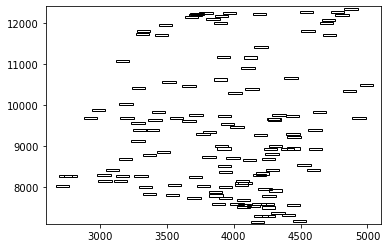

计算次数：3
tabu长度：17
循环次数：0计算次数：3
循环次数：0tabu长度：17
循环次数：50计算次数：2
循环次数：50tabu长度：12
循环次数：100计算次数：1
循环次数：100tabu长度：10
循环次数：150计算次数：2
循环次数：150tabu长度：14
循环次数：200计算次数：1
循环次数：200tabu长度：11
循环次数：250计算次数：2
循环次数：250tabu长度：16
循环次数：300计算次数：2
循环次数：300tabu长度：13
循环次数：350计算次数：1
循环次数：350tabu长度：11
循环次数：400计算次数：2
循环次数：400tabu长度：15
循环次数：450计算次数：2
循环次数：450tabu长度：13
循环次数：500计算次数：2
循环次数：500tabu长度：13
循环次数：550计算次数：1
循环次数：550tabu长度：11
循环次数：600计算次数：2
循环次数：600tabu长度：14
循环次数：650计算次数：1
循环次数：650tabu长度：10
循环次数：700计算次数：2
循环次数：700tabu长度：14
循环次数：750计算次数：2
循环次数：750tabu长度：12
循环次数：800计算次数：2
循环次数：800tabu长度：12
循环次数：850计算次数：1
循环次数：850tabu长度：11
循环次数：900计算次数：2
循环次数：900tabu长度：15
循环次数：950计算次数：2
循环次数：950tabu长度：12
[[1, 1, 0], [2, 1, 0], [3, 1, 0], [4, 4, 0], [5, 1, 0], [6, 2, 0], [7, 3, 0], [8, 3, 0], [9, 2, 0], [10, 4, 0], [11, 4, 0], [12, 4, 0], [13, 2, 0], [14, 4, 0], [15, 2, 0], [16, 2, 0], [17, 2, 0], [18, 3, 0], [19, 4, 0], [20, 1, 0], [21, 3, 1], [22, 1, 0], [23, 4, 0], [24, 4, 1], [25, 2, 0], [26, 3, 0], [27, 1, 0], [28, 1, 1], [

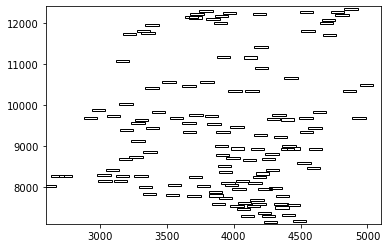

In [49]:
prepare_data(1)
test1_name1 = "1000_10_10_128_random"
test1_name2 = "1000_10_10_128_result"
a,b,c,d = tabusearch(iteration_times=1000,cacu_time=10,tabu_length=10,origin_times=1,costf=costroad,printf=print,namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = costroad(a)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=a,name=nameprefix)
# plt.plot(result_record)
# plt.show()

[[1, 1, 0], [2, 1, 0], [3, 1, 0], [4, 3, 0], [5, 3, 0], [6, 2, 0], [7, 3, 0], [8, 3, 0], [9, 4, 0], [10, 1, 0], [11, 2, 0], [12, 2, 0], [13, 3, 0], [14, 1, 0], [15, 2, 0], [16, 2, 0], [17, 3, 0], [18, 2, 0], [19, 4, 0], [20, 4, 0], [21, 4, 0], [22, 2, 0], [23, 4, 0], [24, 2, 0], [25, 3, 0], [26, 2, 0], [27, 1, 0], [28, 1, 0], [29, 3, 0], [30, 4, 0], [31, 3, 0], [32, 1, 0], [33, 1, 0], [34, 2, 0], [35, 2, 0], [36, 1, 0], [37, 3, 0], [38, 4, 0], [39, 4, 0], [40, 3, 0], [41, 3, 0], [42, 2, 0], [43, 2, 0], [44, 3, 0], [45, 4, 0], [46, 2, 0], [47, 3, 0], [48, 1, 0], [49, 4, 0], [50, 4, 0], [51, 1, 0], [52, 1, 0], [53, 4, 0], [54, 1, 0], [55, 3, 0], [56, 1, 0], [57, 2, 0], [58, 4, 0], [59, 2, 0], [60, 4, 0], [61, 4, 0], [62, 1, 0], [63, 2, 0], [64, 1, 0], [65, 3, 0], [66, 4, 0], [67, 3, 0], [68, 3, 0], [69, 2, 0], [70, 3, 0], [71, 2, 0], [72, 1, 0], [73, 2, 0], [74, 4, 0], [75, 4, 0], [76, 3, 0], [77, 2, 0], [78, 3, 0], [79, 2, 0], [80, 2, 0], [81, 1, 0], [82, 3, 0], [83, 2, 0], [84, 3, 0], 

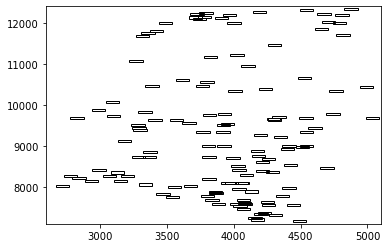

计算次数：3
tabu长度：18
循环次数：0计算次数：3
循环次数：0tabu长度：18
循环次数：50计算次数：1
循环次数：50tabu长度：11
循环次数：100计算次数：2
循环次数：100tabu长度：15
循环次数：150计算次数：1
循环次数：150tabu长度：11
循环次数：200计算次数：3
循环次数：200tabu长度：17
循环次数：250计算次数：2
循环次数：250tabu长度：12
循环次数：300计算次数：2
循环次数：300tabu长度：12
循环次数：350计算次数：1
循环次数：350tabu长度：9
循环次数：400计算次数：2
循环次数：400tabu长度：13
循环次数：450计算次数：1
循环次数：450tabu长度：11
[[1, 4, 1], [2, 4, 0], [3, 1, 1], [4, 2, 0], [5, 1, 0], [6, 3, 0], [7, 4, 0], [8, 3, 0], [9, 2, 0], [10, 3, 0], [11, 1, 0], [12, 3, 0], [13, 4, 0], [14, 3, 0], [15, 2, 0], [16, 2, 0], [17, 3, 0], [18, 2, 1], [19, 4, 0], [20, 1, 0], [21, 4, 1], [22, 3, 0], [23, 4, 0], [24, 3, 1], [25, 4, 0], [26, 3, 0], [27, 1, 0], [28, 1, 0], [29, 1, 0], [30, 3, 0], [31, 1, 0], [32, 2, 0], [33, 4, 0], [34, 3, 0], [35, 3, 0], [36, 3, 0], [37, 3, 0], [38, 4, 0], [39, 3, 0], [40, 3, 0], [41, 1, 0], [42, 4, 0], [43, 1, 0], [44, 4, 0], [45, 2, 0], [46, 3, 0], [47, 3, 0], [48, 4, 0], [49, 1, 0], [50, 2, 0], [51, 1, 0], [52, 4, 0], [53, 3, 0], [54, 3, 0], [55, 1, 0], [56, 4, 

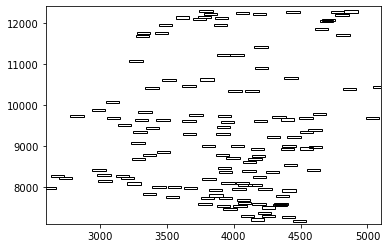

In [50]:
prepare_data(1)
test1_name1 = "500_10_10_128_random"
test1_name2 = "500_10_10_128_result"
a,b,c,d = tabusearch(iteration_times=500,cacu_time=10,tabu_length=10,origin_times=1,costf=costroad,printf=print,namefortest=test1_name1)
# plt.plot(result_record)
# plt.show()
cc = costroad(a)
print(cc)
nameprefix = str(test1_name2) + str(cc)
plot(layout=a,name=nameprefix)
# plt.plot(result_record)
# plt.show()